In [11]:
import pandas as pd
datos = pd.read_csv("celsius.csv")
datos.info()
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   celsius     7 non-null      int64  
 1   fahrenheit  7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 244.0 bytes


,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,8,46.4
4,15,59.0


<Axes: xlabel='celsius', ylabel='fahrenheit'>

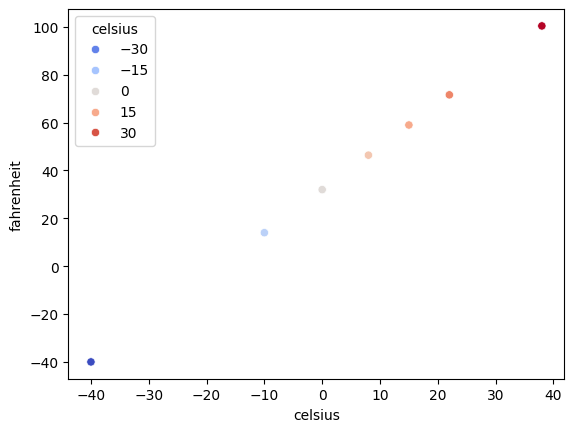

In [12]:
import seaborn as sb
sb.scatterplot(x="celsius", y="fahrenheit", data=datos, hue="celsius", palette="coolwarm")

In [13]:
#Caracteristicas (X), etiqueta(y)
X = datos["celsius"]
y = datos["fahrenheit"]

In [17]:
X_procesada = X.values.reshape(-1,1)
y_procesada = y.values.reshape(-1,1)

In [14]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()


In [18]:
# Entrenamiento
modelo.fit(X_procesada,y_procesada)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
import numpy as np
pred_abs_c = np.array([[-273.15]], dtype=float)
pred_abs_f = modelo.predict(pred_abs_c)[0,0]
print(f"Predicción para -273.15°C: {pred_abs_f:.2f} °F")

array([[-459.67]])

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Métricas del modelo
y_pred = modelo.predict(X_procesada)
print(f"Coeficiente (pendiente): {modelo.coef_[0,0]:.5f}")
print(f"Intercepción: {modelo.intercept_[0]:.5f}")
print(f"R^2: {r2_score(y_procesada, y_pred):.5f}")

# Visualización de la recta de regresión
x_line = np.linspace(datos["celsius"].min(), datos["celsius"].max(), 100).reshape(-1,1)
y_line = modelo.predict(x_line)

sb.scatterplot(x="celsius", y="fahrenheit", data=datos, hue="celsius", palette="coolwarm")
plt.plot(x_line, y_line, color="black", label="Regresión lineal")
plt.legend()
plt.show()
